In [40]:
# imports, global settings

import numpy as np
import pandas as pd

import sklearn as sk
import sklearn.feature_extraction
import sklearn.preprocessing
import sklearn.linear_model

import IPython as IP

import matplotlib.pyplot as plt
%matplotlib inline

import pylab
# print (pylab.rcParams.keys())
pylab.rcParams['figure.figsize'] = (18.0, 8.0)
pylab.rcParams['figure.facecolor'] = "white"
pylab.rcParams['axes.facecolor'] = "white"
pylab.rcParams['font.family'] = "sans"

import matplotlib
matplotlib.style.use('ggplot') # temporary for incompatibility of pandas with matplotlib
# pd.options.display.mpl_style = 'default'

pd.set_option('display.max_rows', 100)

In [41]:
% load_ext autoreload
% autoreload 2

In [3]:
# % install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
# % load_ext autotime

In [42]:
from read_utils import train_test, user_item_matrix
# from recommender import MostPopularRecommender
from pandas.tseries.offsets import *
import seaborn as sns
from eval_metrics import top_n
import pandas as pd
import numpy
import math

Функция rolling_crossval(df, Recommender, k, step, fold_size, start_offset, time_func, time_func_params)  возвращает список точностей и дат конца тестового сета

df - датафрейм с данными

Recommender - класс рекомендатора

k - параметр рекомендатора (число кластеров)

step - шаг, с которым сдвигается старт теста

fold_size - размер тест сета

start_offset - дата старта первого теста получается вычитанием этого оффсета из текущей

time_func - callable следующей сигнатуры - time_func(order_date, time_func_params). Возвращает значение, прибавляемое в user_item матрицу

time_func_params - параметр функции взвешивания, если много коэффициентов - стоит положить дикт

In [43]:
from ts_crossval import rolling_crossval, rolling_crossval_draft

Пример использования кроссвалидации и функции взвешивания

Взвешивание экспоненциальное приведено в качестве примера, дефолтное поведение кроссвалидатора - работать без взвешивания

In [44]:
import sys
sys.stdout = open('logs', 'w')

In [60]:
%%time

from recommender import ClusteringRecommender,\
    SVDRecommender, MostPopularRecommender,\
    SecondaryMostPopularRecommender,\
    UserBasedRecommender, ItemBasedRecommender, FMRecommender

input_file_path = "../input/orders_items_registrations.csv"
df = pd.read_csv(input_file_path, encoding="utf-8", low_memory=False)
df['order_date'] = pd.to_datetime(df['order_date'])
cur_time = df["order_date"].max()

def time_func(order_time, param):
    tdelta = cur_time - order_time
    tdelta = tdelta.days
    return math.exp(param*tdelta)

with open('test', 'w') as f:
    f.write('')
    


# svd_accs = rolling_crossval(df, SVDRecommender, k=6, step=DateOffset(months=0, days=14), 
#                             start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)
# most_pop_accs = rolling_crossval(df, MostPopularRecommender, k=6, step=DateOffset(months=0, days=14), 
#                                  start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)
# clustering_accs = rolling_crossval(df, ClusteringRecommender, k=6, step=DateOffset(months=0, days=14), 
#                                    start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)

rolling_crossval_draft(input_file_path, cur_time, SVDRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)
rolling_crossval_draft(input_file_path, cur_time, MostPopularRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)
rolling_crossval_draft(input_file_path, cur_time, SecondaryMostPopularRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)
rolling_crossval_draft(input_file_path, cur_time, UserBasedRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)
rolling_crossval_draft(input_file_path, cur_time, FMRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)

# clustering_accs = rolling_crossval_draft(input_file_path, cur_time, ClusteringRecommender, k=6, step=DateOffset(months=1, days=0), 
#                                    start_offset=DateOffset(months=13), time_func_params=0.5)

read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(co

In [61]:
from json import loads

fold_accuracies = list()
with open('test') as f:
    for l in f.readlines():
        fold_accuracies.append(loads(l))
fold_accuracies = pd.DataFrame(fold_accuracies).sort_values('train_end_date')

In [62]:
fold_accuracies.set_index('train_end_date')

RecommenderClass  accuracy
train_end_date                                                            
2015-07-04 17:39:24                   recommender.SVDRecommender  0.318548
2015-07-04 17:39:24  recommender.SecondaryMostPopularRecommender  0.439516
2015-07-04 17:39:24             recommender.UserBasedRecommender  0.475806
2015-07-04 17:39:24           recommender.MostPopularRecommender  0.439516
2015-07-04 17:39:24                    recommender.FMRecommender  0.467742
2015-08-04 20:31:33             recommender.UserBasedRecommender  0.452954
2015-08-04 20:31:33  recommender.SecondaryMostPopularRecommender  0.299781
2015-08-04 20:31:33                    recommender.FMRecommender  0.428884
2015-08-04 20:31:33           recommender.MostPopularRecommender  0.293217
2015-08-04 20:31:33                   recommender.SVDRecommender  0.301969
2015-09-04 20:34:33  recommender.SecondaryMostPopularRecommender  0.380531
2015-09-04 20:34:33           recommender.MostPopularRecommender  0.342183
2015-09-04 20:34:33                   recommender.SVDRecommender  0.306785
2015-09-04 20:34:33                    recommender.FMRecommender  0.469027
2015-09-04 20:34:33             recommender.UserBasedRecommender  0.483776
2015-10-04 20:43:21  recommender.SecondaryMostPopularRecommender  0.276882
2015-10-04 20:43:21                    recommender.FMRecommender  0.352151
2015-10-04 20:43:21           recommender.MostPopularRecommender  0.252688
2015-10-04 20:43:21                   recommender.SVDRecommender  0.239247
2015-10-04 20:43:21             recommender.UserBasedRecommender  0.330645
2015-11-04 20:03:55  recommender.SecondaryMostPopularRecommender  0.202358
2015-11-04 20:03:55                    recommender.FMRecommender  0.361493
2015-11-04 20:03:55                   recommender.SVDRecommender  0.172888
2015-11-04 20:03:55           recommender.MostPopularRecommender  0.198428
2015-11-04 20:03:55             recommender.UserBasedRecommender  0.335953
2015-12-03 23:15:15             recommender.UserBasedRecommender  0.378933
2015-12-03 23:15:15                    recommender.FMRecommender  0.414501
2015-12-03 23:15:15  recommender.SecondaryMostPopularRecommender  0.217510
2015-12-03 23:15:15                   recommender.SVDRecommender  0.169631
2015-12-03 23:15:15           recommender.MostPopularRecommender  0.262654
2016-01-03 23:34:36           recommender.MostPopularRecommender  0.487124
2016-01-03 23:34:36  recommender.SecondaryMostPopularRecommender  0.437768
2016-01-03 23:34:36                   recommender.SVDRecommender  0.324034
2016-01-03 23:34:36                    recommender.FMRecommender  0.547210
2016-01-03 23:34:36             recommender.UserBasedRecommender  0.542918
2016-02-04 18:50:18                   recommender.SVDRecommender  0.331325
2016-02-04 18:50:18                    recommender.FMRecommender  0.510040
2016-02-04 18:50:18           recommender.MostPopularRecommender  0.481928
2016-02-04 18:50:18             recommender.UserBasedRecommender  0.544177
2016-02-04 18:50:18  recommender.SecondaryMostPopularRecommender  0.500000
2016-03-04 19:07:12             recommender.UserBasedRecommender  0.349333
2016-03-04 19:07:12  recommender.SecondaryMostPopularRecommender  0.221333
2016-03-04 19:07:12                    recommender.FMRecommender  0.381333
2016-03-04 19:07:12           recommender.MostPopularRecommender  0.194667
2016-03-04 19:07:12                   recommender.SVDRecommender  0.194667
2016-04-04 20:09:02                   recommender.SVDRecommender  0.160149
2016-04-04 20:09:02           recommender.MostPopularRecommender  0.327747
2016-04-04 20:09:02                    recommender.FMRecommender  0.407821
2016-04-04 20:09:02  recommender.SecondaryMostPopularRecommender  0.303538
2016-04-04 20:09:02             recommender.UserBasedRecommender  0.417132
2016-05-04 20:30:11                    recommender.FMRecommender  0.405458
2016-05-04 20:30:11           recommender.MostPopularRecommender  0.34502

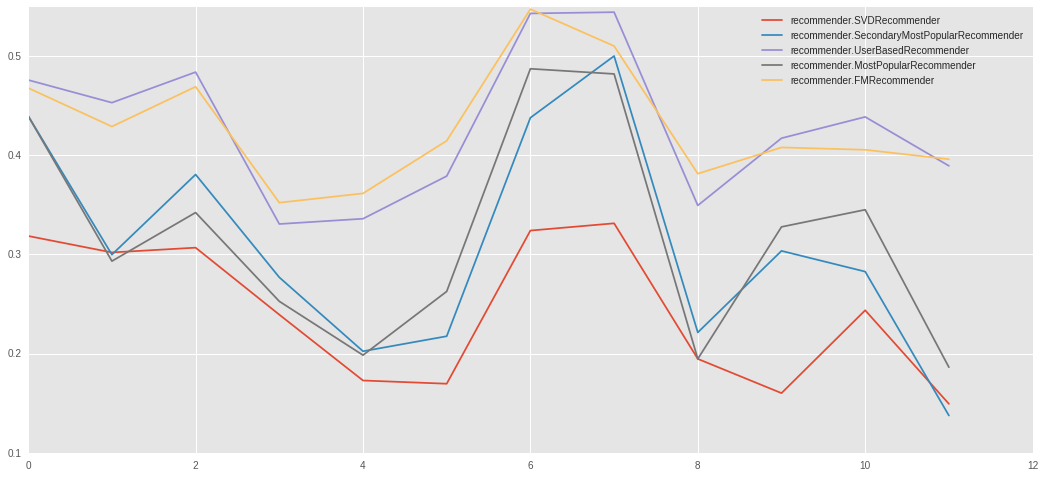

In [63]:
for recommender in fold_accuracies.RecommenderClass.unique():
    data = fold_accuracies[fold_accuracies.RecommenderClass == recommender].reset_index()
    plt.plot(data.accuracy, label=recommender)

plt.legend()
plt.show()

In [64]:
fold_accuracies.groupby("RecommenderClass").accuracy.mean()

RecommenderClass
recommender.FMRecommender                      0.428469
recommender.MostPopularRecommender             0.317619
recommender.SVDRecommender                     0.242686
recommender.SecondaryMostPopularRecommender    0.308288
recommender.UserBasedRecommender               0.428291
Name: accuracy, dtype: float64

In [10]:
# sns.plt.plot([i for i, val in enumerate(most_pop_accs)], [i[1] for i in most_pop_accs], "r")
# sns.plt.plot([i for i, val in enumerate(svd_accs)], [i[1] for i in svd_accs], 'g')
# sns.plt.plot([i for i, val in enumerate(clustering_accs)], [i[1] for i in clustering_accs], 'b')

# sns.plt.show()